In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Lets training and testing simultaneously
import numpy as np
import pandas as pd
% matplotlib inline

train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_IncomePrediction/tcd-ml-comp-201920-income-pred-group/tcd-ml-1920-group-income-train.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_IncomePrediction/tcd-ml-comp-201920-income-pred-group/tcd-ml-1920-group-income-test.csv")
test_copy = test_df.copy()

## checking missing data in testing data
print ('Missing data in each Income dataframe column:')
for c in test_copy.columns:
    missing_data = len(test_copy) - test_copy[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(test_copy))) *  100, 2)), '% of total')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Missing data in each Income dataframe column:
Year of Record : 1494 missing values is 0.4 % of total
Satisfation with employer : 13432 missing values is 3.64 % of total
Gender : 26308 missing values is 7.12 % of total
Country : 1 missing values is 0.0 % of total
Profession : 1041 missing values is 0.28 % of total
University Degree : 28738 missing values is 7.78 % of total
Hair Color : 24651 missing values is 6.67 % of total
Total Yearly Income [EUR] : 369438 missing values is 100.0 % of total


In [0]:
## checking missing data in training data

print ('Missing data in each Income dataframe column:')
for c in train_df.columns:
    missing_data = len(train_df) - train_df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(train_df))) *  100, 2)), '% of total')

Missing data in each Income dataframe column:
Year of Record : 4013 missing values is 0.38 % of total
Satisfation with employer : 38087 missing values is 3.63 % of total
Gender : 74127 missing values is 7.07 % of total
Profession : 2853 missing values is 0.27 % of total
University Degree : 80600 missing values is 7.69 % of total
Hair Color : 70211 missing values is 6.7 % of total


In [0]:
#Lets describe training data
train_copy = train_df.copy()

train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'] = train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].str.replace(' EUR', '')
test_copy['Yearly Income in addition to Salary (e.g. Rental Income)'] = test_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].str.replace(' EUR', '')

category = train_df.select_dtypes(exclude=[np.number])
category.describe()

,Housing Situation,Work Experience in Current Job [years],Satisfation with employer,Gender,Country,Profession,University Degree,Hair Color,Yearly Income in addition to Salary (e.g. Rental Income)
count,1048574,1048574,1010487,974447,1048574,1045721,967974,978363,1048574
unique,10,109,4,6,174,1354,5,6,88309
top,Large House,12,Average,male,Honduras,payment analyst,Bachelor,Black,0 EUR
freq,166291,49606,487634,400113,111155,2374,396585,400652,946048


In [0]:
## Handling of missing data in both training and testing data
train_copy['University Degree'] = train_copy['University Degree'].fillna('unknown')
train_copy['University Degree'] = train_copy['University Degree'].replace('0', 'unknown')
train_copy['Satisfation with employer']= train_copy['Satisfation with employer'].fillna('unknown')
train_copy['Gender'] = train_copy['Gender'].fillna('unknown')
train_copy['Profession'] = train_copy['Profession'].fillna('unknown')

test_copy['Gender'] = test_copy['Gender'].replace('f', 'female')
test_copy['Gender'] = test_copy['Gender'].replace('0', 'unknown')
test_copy['Gender'] = test_copy['Gender'].replace('other', 'unknown')
test_copy['Gender'] = test_copy['Gender'].fillna('unknown')
test_copy['Satisfation with employer']= test_copy['Satisfation with employer'].fillna('unknown')
test_copy['Housing Situation'] = test_copy['Housing Situation'].replace('nA', 'unknown')
test_copy['Housing Situation'] = test_copy['Housing Situation'].replace(0,'unknown')
test_copy['Housing Situation'] = test_copy['Housing Situation'].replace('0','unknown')
test_copy['University Degree'] = test_copy['University Degree'].fillna('unknown')
test_copy['University Degree'] = test_copy['University Degree'].replace('0', 'unknown')
test_copy['Year of Record'] = test_copy['Year of Record'].fillna(test_copy['Year of Record'].mean())
test_copy['Work Experience in Current Job [years]'] = test_copy['Work Experience in Current Job [years]'][test_copy['Work Experience in Current Job [years]']!='#NUM!'].astype(float)
test_copy['Work Experience in Current Job [years]'] = test_copy['Work Experience in Current Job [years]'].fillna(test_copy['Work Experience in Current Job [years]'].mean())
test_copy['Profession'] = test_copy['Profession'].fillna('unknown')
test_copy['Country'] = test_copy['Country'].fillna('unknown')

train_copy['Gender'] = train_copy['Gender'].replace('f', 'female')
train_copy['Gender'] = train_copy['Gender'].replace('0', 'unknown')
train_copy['Gender'] = train_copy['Gender'].replace('other', 'unknown')
train_copy['Housing Situation'] = train_copy['Housing Situation'].replace('nA', 'unknown')
train_copy['Housing Situation'] = train_copy['Housing Situation'].replace(0,'unknown')
train_copy['Housing Situation'] = train_copy['Housing Situation'].replace('0','unknown')
train_copy['Year of Record'] = train_copy['Year of Record'].fillna(train_copy['Year of Record'].mean())
#train_copy = train_copy[train_copy.Profession !='NA']

train_copy['Work Experience in Current Job [years]'] = train_copy['Work Experience in Current Job [years]'][train_copy['Work Experience in Current Job [years]']!='#NUM!'].astype(float)
train_copy['Work Experience in Current Job [years]'] = train_copy['Work Experience in Current Job [years]'].fillna(train_copy['Work Experience in Current Job [years]'].mean())
train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'] = train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].astype(float)
train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'] = train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].fillna(train_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].median())
train_copy['Total Yearly Income [EUR]'] = train_copy['Total Yearly Income [EUR]'].fillna(train_copy['Total Yearly Income [EUR]'].mean())
train_copy['Body Height [cm]'] = train_copy['Body Height [cm]'].fillna(train_copy['Body Height [cm]'].mean())

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


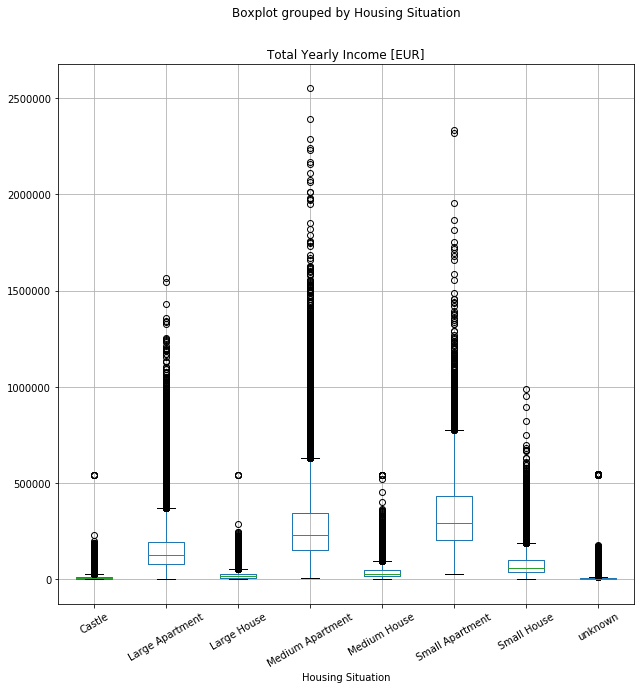

In [0]:
train_copy.boxplot('Total Yearly Income [EUR]','Housing Situation',rot = 30,figsize=(10,10))


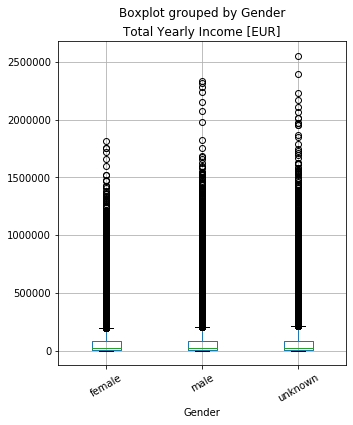

In [0]:
train_copy.boxplot('Total Yearly Income [EUR]','Gender',rot = 30,figsize=(5,6))

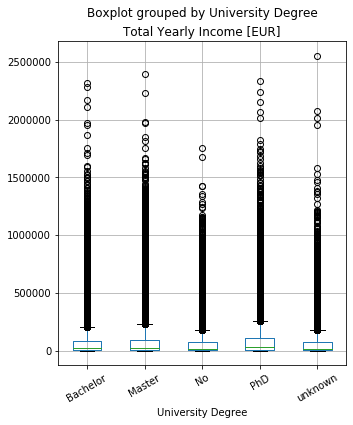

In [0]:
train_copy.boxplot('Total Yearly Income [EUR]','University Degree',rot = 30,figsize=(5,6))

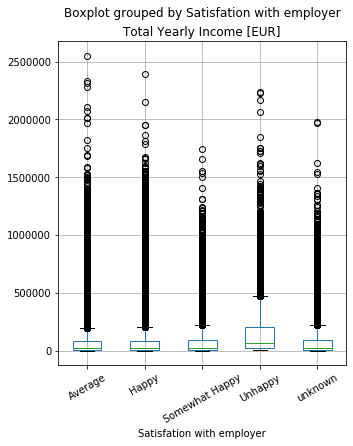

In [0]:
train_copy.boxplot('Total Yearly Income [EUR]','Satisfation with employer',rot = 30,figsize=(5,6))

In [0]:
print ('Missing data in each Income dataframe column:')
for c in train_copy.columns:
    missing_data = len(train_copy) - train_copy[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(train_copy))) *  100, 2)), '% of total')

train_copy['Year of Record'] = train_copy['Year of Record'].fillna(train_copy['Year of Record'].mean())

Missing data in each Income dataframe column:
Hair Color : 70211 missing values is 6.7 % of total


In [0]:
print ('Missing data in each Income dataframe column:')
for c in test_copy.columns:
    missing_data = len(test_copy) - test_copy[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(test_copy))) *  100, 2)), '% of total')

Missing data in each Income dataframe column:
Hair Color : 24651 missing values is 6.67 % of total
Total Yearly Income [EUR] : 369438 missing values is 100.0 % of total


In [0]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 102kB 2.8MB/s 


In [0]:
## Frequency encoding on below 2 columns

train_cat = train_copy.copy()
for c in ['Country', 'Profession']:
    train_copy[c] = train_copy.groupby(c).transform('count')/len(train_copy[c])

test_cat = test_copy.copy()
for c in ['Country', 'Profession']:
    test_copy[c] = test_copy.groupby(c).transform('count')/len(test_copy[c])

In [0]:
## Label encoding on ordinal data

housing_ord_map = {'unknown': 0, 'Small Apartment': 1, 'Medium Apartment': 2, 'Large Apartment': 3, 'Small House': 4, 'Medium House': 5, 'Large House':6, 'Castle':7 }
train_copy['HousingLabel'] = train_copy['Housing Situation'].map(housing_ord_map)
test_copy['HousingLabel'] = test_copy['Housing Situation'].map(housing_ord_map)

train_copy['Satisfation with employer'].value_counts()
Satisfaction_ord_map = {'unknown': 0, 'Unhappy': 1, 'Somewhat Happy': 2, 'Average': 3, 'Happy': 4}
train_copy['SatisfactionLabel'] = train_copy['Satisfation with employer'].map(Satisfaction_ord_map)
test_copy['SatisfactionLabel'] = test_copy['Satisfation with employer'].map(Satisfaction_ord_map)

train_copy['University Degree'].value_counts()
Degree_ord_map = {'No': 0, 'unknown': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
train_copy['DegreeLabel'] = train_copy['University Degree'].map(Degree_ord_map)
test_copy['DegreeLabel'] = test_copy['University Degree'].map(Degree_ord_map)

## One hot coding on gender column
gender_copy = pd.get_dummies(train_copy['Gender'])
gender_test = pd.get_dummies(test_copy['Gender'])

train_merge =pd.concat([train_copy, gender_copy], axis=1)
train_merge = train_merge.drop(columns = ['Instance','Housing Situation','Satisfation with employer','Gender','University Degree','Total Yearly Income [EUR]','Wears Glasses', 'Hair Color'])
# with count encoding
#train_merge =pd.concat([train_cat, gender_copy], axis=1)
#train_merge = train_merge.drop(columns = ['Instance','Housing Situation','Satisfation with employer','Gender','University Degree','Total Yearly Income [EUR]','Wears Glasses', 'Hair Color'])

## Since income varies a lot, take its log
yt = np.log(train_copy['Total Yearly Income [EUR]'])

test_merge =pd.concat([test_copy, gender_test], axis=1)
test_merge = test_merge.drop(columns = ['Instance','Housing Situation','Satisfation with employer','Gender','University Degree','Total Yearly Income [EUR]','Wears Glasses', 'Hair Color'])


In [0]:
## Lets do some interactions among features.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    poly = PolynomialFeatures(interaction_only=True, include_bias =False, degree=2)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df= df.drop(df.columns[noint_indices], axis=1)

    return df 


Interaction_merge =train_merge[['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)']]
X = add_interactions(Interaction_merge)

new_df = train_merge.drop(columns = ['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)'])
Train_features = pd.concat([X, new_df], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Train_features, yt, test_size=0.20, random_state = 7)

scaler = StandardScaler().fit(Xtrain)
rescaled_X_train = scaler.transform(Xtrain)

rescaled_X_test = scaler.transform(Xtest)

In [0]:
# checking xgb 
# XGB gaves us pretty much good results. I just selected n_estimators by hit and trial method

from xgboost import XGBRegressor
import xgboost
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

model = xgboost.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
## 3200 not yet uploaded
xgb = model.fit(rescaled_X_train, Ytrain, early_stopping_rounds=5, 
             eval_set=[(rescaled_X_test, Ytest)], verbose=False)

y_pred = xgb.predict(rescaled_X_test)

print('The accuracy of the XGB Regression is',r2_score(Ytest,y_pred))
print ('MAE is: \n', (mean_absolute_error(Ytest, y_pred)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


The accuracy of the XGB Regression is 0.9846275475953683
MAE is: 
 0.14871372806162497


In [0]:
## Lets do prediciton on test data
Interaction_test_merge =test_merge[['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)']]
X_test = add_interactions(Interaction_test_merge)
test_feature_df = test_merge.drop(columns = ['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)'])
Test_features = pd.concat([X_test, test_feature_df], axis=1)

#test_new = Test_features[Train_features.columns[chiselector.get_support()]]
X_test_new = scaler.transform(Test_features)
predictions = xgb.predict(X_test_new)

actual_predictions = np.exp(predictions)
actual_predictions.max()

2452454.0

Lets apply Catboost and parameters, iterations are chosen by hit and trial method, Other iterations I have taken it out from code

In [0]:
!pip install catboost

     |████████████████████████████████| 63.0MB 1.6MB/s 


In [0]:
from catboost import CatBoostRegressor, FeaturesData, Pool
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

cb = CatBoostRegressor(iterations=16000, learning_rate=0.01, depth=10, eval_metric ='MAE', bagging_temperature = 0.2)

cb.fit(rescaled_X_train, Ytrain, eval_set=[(rescaled_X_test, Ytest)], verbose=False, use_best_model=True)
y_pred = cb.predict(rescaled_X_test)

print('The accuracy of the XGB Regression is',r2_score(Ytest,y_pred))
print ('MAE is: \n', (mean_absolute_error(Ytest, y_pred)))

The accuracy of the XGB Regression is 0.989878334610368
MAE is: 
 0.11606056665664698


In [0]:
print ('MAE is: \n', (mean_absolute_error(np.exp(Ytest), np.exp(y_pred))))

MAE is: 
 8210.103648418317


In [0]:
rescaled_X_test.shape

(209715, 36)

In [0]:
from catboost import CatBoostRegressor, FeaturesData, Pool
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

cb = CatBoostRegressor(iterations=32000, learning_rate=0.01, depth=10, eval_metric ='MAE', bagging_temperature = 0.2)

cb.fit(rescaled_X_train, Ytrain, eval_set=[(rescaled_X_test, Ytest)], verbose=False, use_best_model=True)
y_pred = cb.predict(rescaled_X_test)

print('The accuracy of the XGB Regression is',r2_score(Ytest,y_pred))
print ('MAE is: \n', (mean_absolute_error(Ytest, y_pred)))

The accuracy of the XGB Regression is 0.990068190662681
MAE is: 
 0.11356116421374232


In [0]:
print ('MAE is: \n', (mean_absolute_error(np.exp(Ytest), np.exp(y_pred))))

## we got pretty much good results from CatBoost

MAE is: 
 8107.391045507938


In [0]:
## Below predictions were done on 16k iterations as 32k iterations gave me same results
Interaction_test_merge =test_merge[['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)']]
X_test = add_interactions(Interaction_test_merge)
test_feature_df = test_merge.drop(columns = ['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)'])
Test_features = pd.concat([X_test, test_feature_df], axis=1)


X_test_new = scaler.transform(Test_features)
predictions = cb.predict(X_test_new)

actual_predictions = np.exp(predictions)
actual_predictions.max()

3221027.1135595758

I did apply RandomForest regressor as well in order to improve accuracy but didn't use it for final predictiosn. It can be ignores. Again hyper parameters were chosen from hit and trial method

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rgb = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rgb.fit(rescaled_X_train, Ytrain)
y_pred = rgb.predict(rescaled_X_test)

print('The accuracy of the Random  forest Regression is',r2_score(Ytest,y_pred))
print ('MAE is: \n', (mean_absolute_error(Ytest, y_pred)))

The accuracy of the Random  forest Regression is 0.9877409303954264
MAE is: 
 0.12282739609752154


In [0]:
##below block for best features

from sklearn.feature_selection import  f_regression
from sklearn.feature_selection import SelectKBest 

chiselector = SelectKBest(f_regression, k=50)
X_best = chiselector.fit_transform(Train_features, yt)

train_new = Train_features[Train_features.columns[chiselector.get_support()]]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_new, yt, test_size=0.20, random_state = 7)

scaler = StandardScaler().fit(Xtrain)
rescaled_X_train = scaler.transform(Xtrain)

rescaled_X_test = scaler.transform(Xtest)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rgb = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rgb.fit(rescaled_X_train, Ytrain)
y_pred = rgb.predict(rescaled_X_test)

print('The accuracy of the Random  forest Regression is',r2_score(Ytest,y_pred))
print ('MAE is: \n', (mean_absolute_error(Ytest, y_pred)))

The accuracy of the Random  forest Regression is 0.9872115135711375
MAE is: 
 0.1259235034515482


In [0]:
## Below predictions were done on best 50 features
Interaction_test_merge =test_merge[['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)','HousingLabel', 'SatisfactionLabel', 'DegreeLabel']]
X_test = add_interactions(Interaction_test_merge)
test_feature_df = test_merge.drop(columns = ['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)', 'HousingLabel', 'SatisfactionLabel', 'DegreeLabel'])
Test_features = pd.concat([X_test, test_feature_df], axis=1)

test_new = Test_features[Train_features.columns[chiselector.get_support()]]
X_test_new = scaler.transform(test_new)
predictions = rgb.predict(X_test_new)

actual_predictions = np.exp(predictions)
actual_predictions.max()


1813320.9103791565

In [0]:
## ## Below predictions were done on best 50 features
Interaction_test_merge =test_merge[['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)','HousingLabel', 'SatisfactionLabel', 'DegreeLabel']]
X_test = add_interactions(Interaction_test_merge)
test_feature_df = test_merge.drop(columns = ['Year of Record', 'Crime Level in the City of Employement','Work Experience in Current Job [years]', 'Age','Size of City','Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)', 'HousingLabel', 'SatisfactionLabel', 'DegreeLabel'])
Test_features = pd.concat([X_test, test_feature_df], axis=1)

X_test = scaler.transform(Test_features)
predictions = rgb.predict(X_test)

actual_predictions = np.exp(predictions)
actual_predictions.max()

1768348.8893154494

In [0]:
# submission was done finally on Catboost regressor.
submissions =pd.DataFrame({'Instance': test_df['Instance'], 'Total Yearly Income [EUR]': actual_predictions}, columns =['Instance','Total Yearly Income [EUR]'])
filename ='tcd ml 2019-20 income prediction submission file.csv'
submissions.to_csv(filename, index=False)
print('Saved File '+ filename)

Saved File tcd ml 2019-20 income prediction submission file.csv
